# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange"> Numerical exercises 11: Samuele Voltan's notebook. </span>

In [1]:
# LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D

### <span style="color:red"> Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### <span style="color:orange"> Solution
    
Here I show my results in exploring the NN with the following number of **epochs** and **training data points**.

In [2]:
n_epochs = [10, 50, 150]
n_train = [50, 250, 500]

The other parameters of the simulation are shown below.

In [3]:
# PARAMETERS
m = 2
b = 1
row = len(n_epochs)*len(n_train)
cols = 3
i = 1

I start by setting the **noise $\sigma=0$**. This shall give good results, since the validation data are highly correlated.

<Figure size 432x288 with 0 Axes>

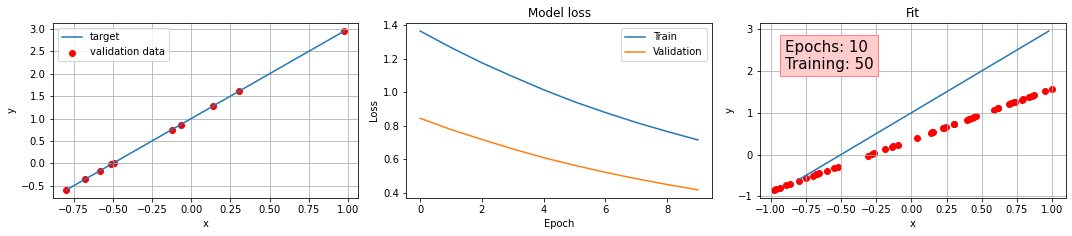

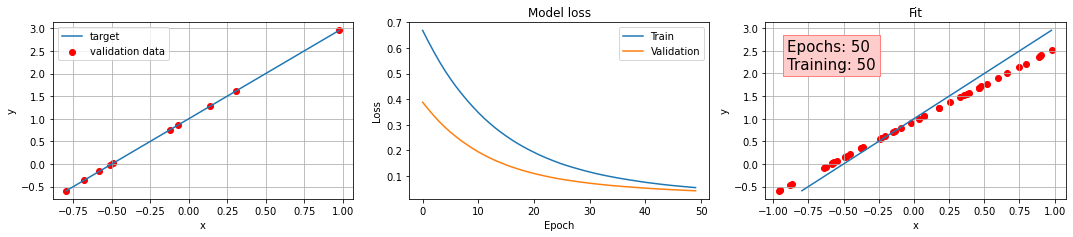

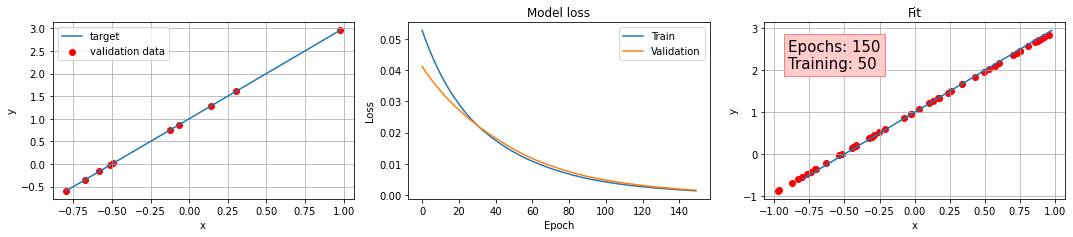

<Figure size 432x288 with 0 Axes>

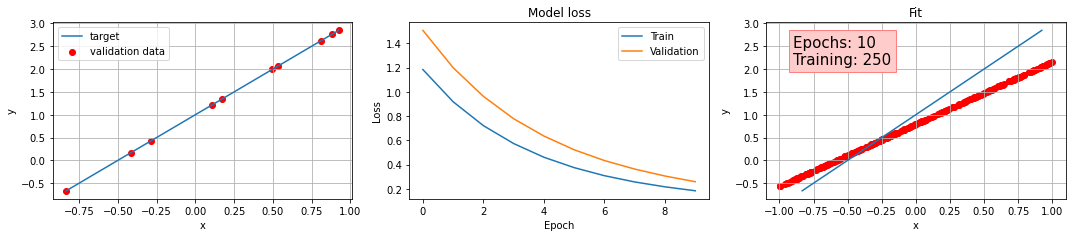

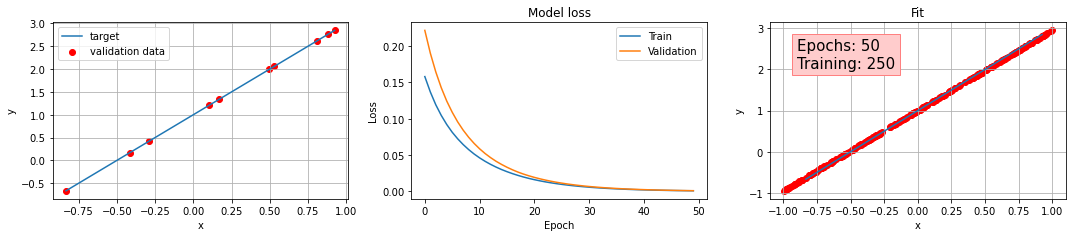

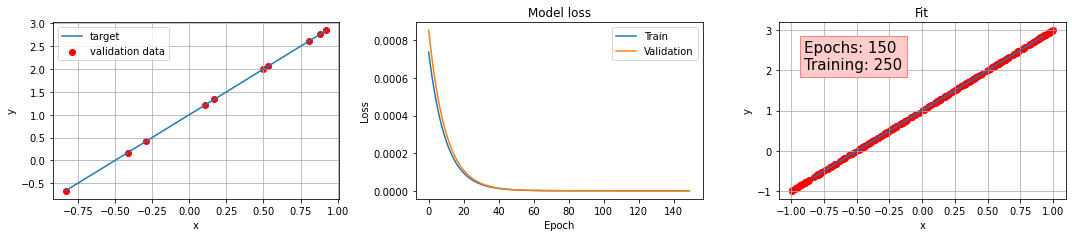

<Figure size 432x288 with 0 Axes>

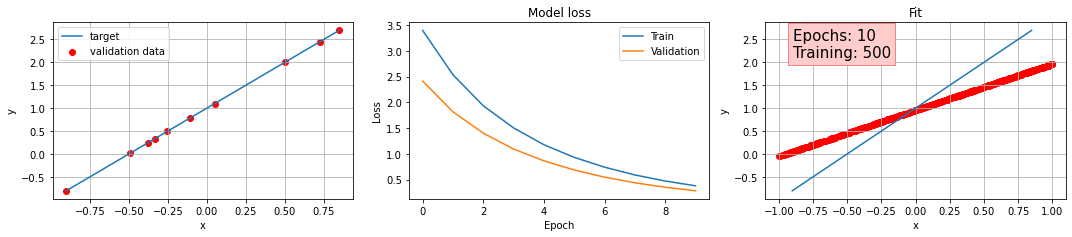

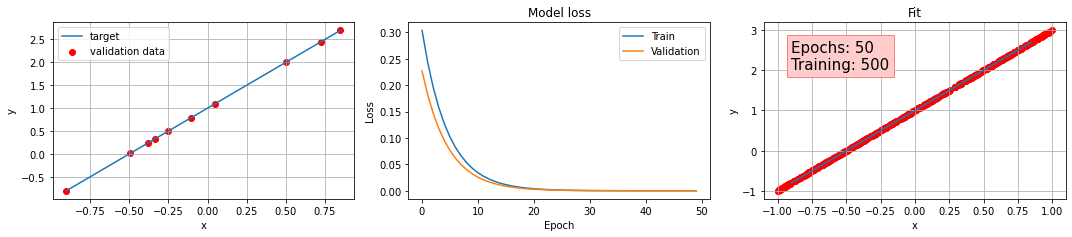

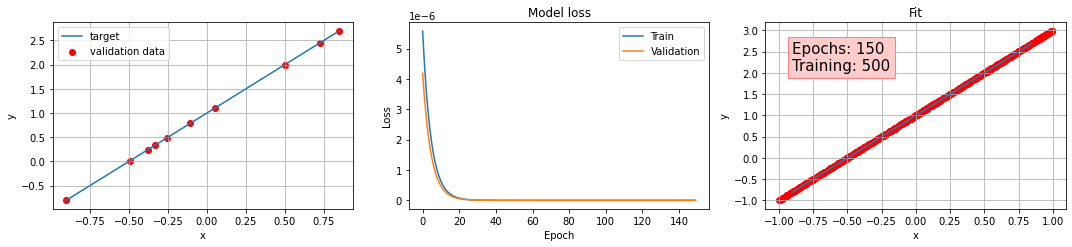

In [4]:
sigma = 0
for n in n_train:

    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
    plt.suptitle("Different models for " +str(sigma)+ " gaussian noise", fontsize = "xx-large")
    for e in n_epochs:
        history = model.fit(x = x_train, y = y_train, 
            batch_size = 32, epochs = e,
            shuffle = True,
            validation_data = (x_valid, y_valid), verbose=0)
            
        plt.figure(figsize=(15,3*row))

        plt.subplot(row, cols, i+1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title("Model loss")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()
          
        plt.subplot(row, cols, i+2)           
        plt.title("Fit")
        x_predicted = np.random.uniform(-1, 1, n)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.text(-0.9, 2.75, r"Epochs: "+str(e)+"\nTraining: "+ str(n), size = 15,
             ha = "left", va = "top",
             bbox=dict(boxstyle = "square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                   )
             )  
        plt.ylabel("y")
        plt.xlabel("x")
        plt.grid(True)
        
        plt.subplot(row, cols, i)
        plt.plot(x_valid, y_target, label='target')
        plt.scatter(x_valid, y_valid, color='r', label='validation data')
        plt.legend()
        plt.grid(True)
        plt.ylabel("y")
        plt.xlabel("x")
        
        plt.tight_layout()
        plt.show()
            
        i=i+3;

Indeed, with no gaussian noise is pretty easy to reach the convergence between training loss and validation loss. The courious behavior in the last loss picture can be explained by simply looking at the expoent of the losses.

I now set the **noise $\sigma=0.4$**.

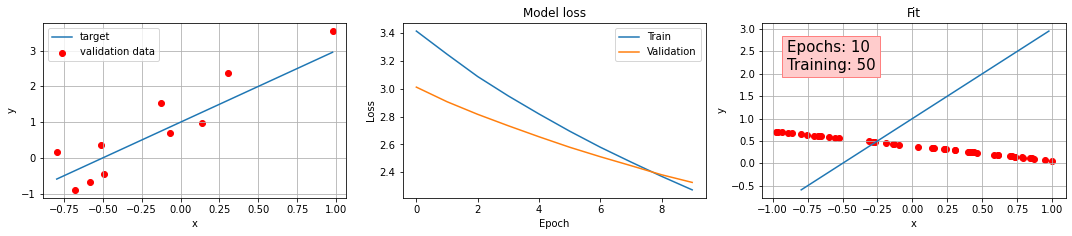

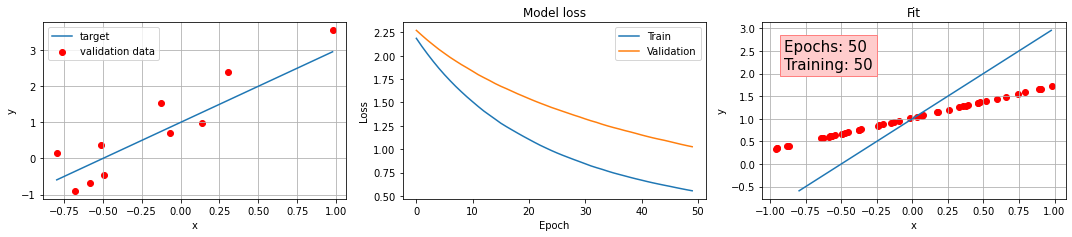

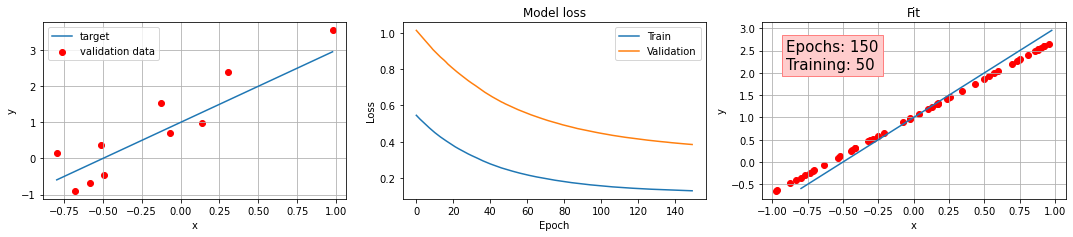

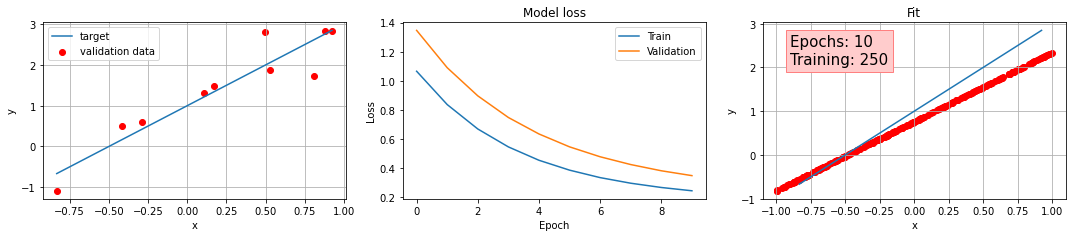

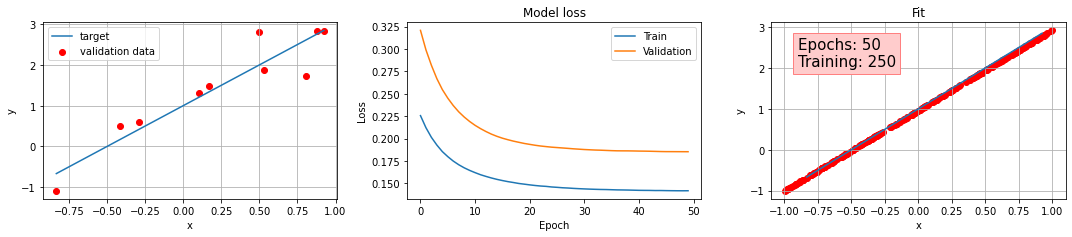

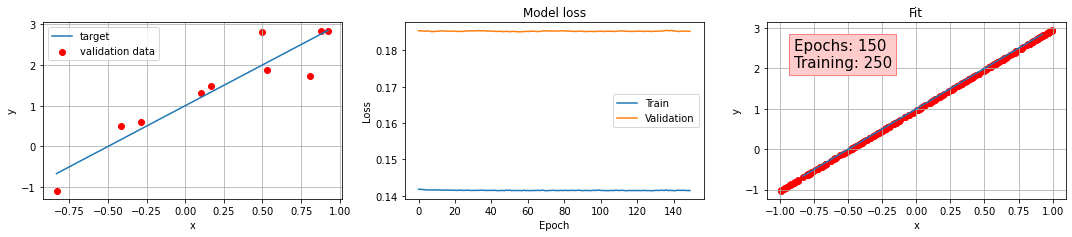

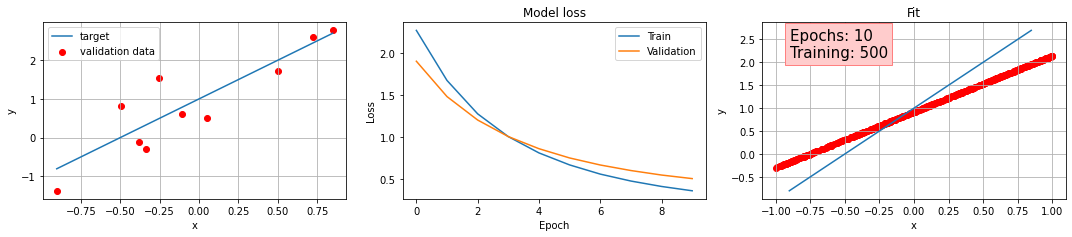

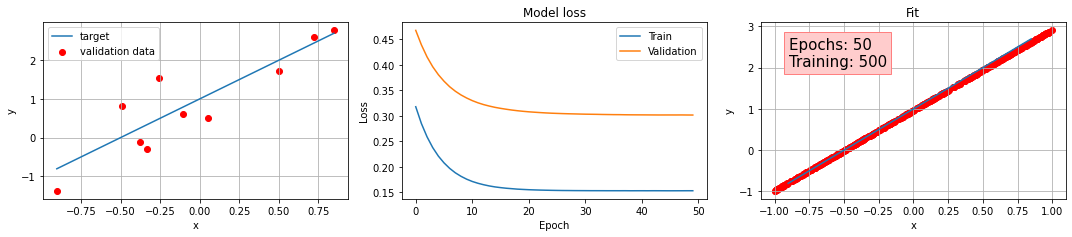

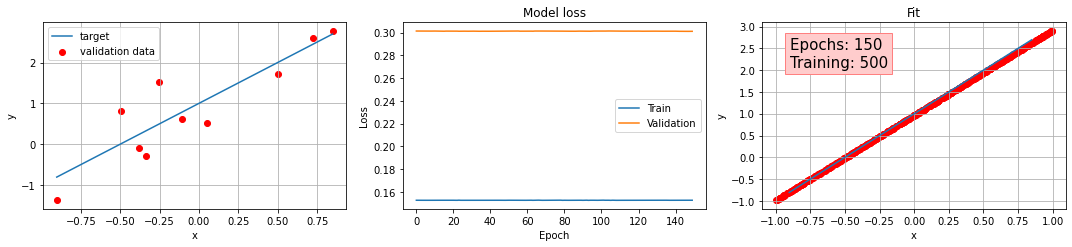

In [5]:
i=1
sigma = 0.4
for n in n_train:

    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, n)
    x_valid = np.random.uniform(-1, 1, 10)
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma)
    y_valid = np.random.normal(m * x_valid + b, sigma)
         
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
    for e in n_epochs:
        history = model.fit(x = x_train, y = y_train, 
            batch_size = 32, epochs = e,
            shuffle = True,
            validation_data = (x_valid, y_valid), verbose=0)
            
        plt.figure(figsize=(15,3*row))

        plt.subplot(row, cols, i+1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title("Model loss")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='best')
        plt.tight_layout()
          
        plt.subplot(row, cols, i+2)           
        plt.title("Fit")
        x_predicted = np.random.uniform(-1, 1, n)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.text(-0.9, 2.75, r"Epochs: "+str(e)+"\nTraining: "+ str(n), size = 15,
             ha = "left", va = "top",
             bbox=dict(boxstyle = "square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                   )
             )  
        plt.ylabel("y")
        plt.xlabel("x")
        plt.grid(True)
        
        plt.subplot(row, cols, i)
        plt.plot(x_valid, y_target, label='target')
        plt.scatter(x_valid, y_valid, color='r', label='validation data')
        plt.legend()
        plt.grid(True)
        plt.ylabel("y")
        plt.xlabel("x")
        
        plt.tight_layout()
        plt.show()
            
        i=i+3;

### <span style="color:red"> Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### <span style="color:orange"> Solution

In [6]:
# DEFINITIONS
a = 4
b = -3
c = -2
d = 3

def f(x):
    return a + b*x + c*x**2 + d*x**3

In [7]:
sigma = .7
n_train = 10000

# Generate data
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_train // 10)
x_test = np.random.uniform(-1, 1, n_train // 10)
x_target = np.linspace(-1.5, 1.5, 1000)
x_target1 = np.linspace(-1, 1, 1000)
y_target = f(x_target) # ideal (target) linear function
y_target1 = f(x_target1) # ideal (target) linear function
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)
y_test = np.random.normal(f(x_test), sigma)

def polynomial_fit(n_layers, n_neurons, activation, optimizer, loss):
    
    np.random.seed(0)
    tf.random.set_seed(0)

    # Plot data
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    plt.grid(True)
    plt.plot(x_target1, y_target1, label='Target')
    plt.scatter(x_train, y_train, label='Data', color='r')
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.legend()

    # Build neural network
    model = tf.keras.Sequential()
    model.add(Dense(n_neurons, input_shape=(1,), activation=activation))
    for i in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
    model.add(Dense(1,))
    model.compile(optimizer=optimizer, loss=loss)
    
    # Train neural network
    history = model.fit(x=x_train, y=y_train, 
        batch_size=32, epochs=30,
        shuffle=True,                                   # a good idea is to shuffle input before at each epoch
        validation_data=(x_valid, y_valid), verbose=0)

    # Evaluate neural network
    score = history.history["loss"][-1]  # On training data
    print("Training loss:", score)
    score = history.history["val_loss"][-1]  # On validation data
    print("Validation loss:", score)
    score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)  # On never seen data
    print("Test loss:", score)
   
    # Predict data
    x_predicted = np.random.uniform(-1.5, 1.5, 500)
    y_predicted = model.predict(x_predicted)
    plt.subplot(1, 3, 3)
    plt.title("Fit")
    plt.text(-1.5, -3.75, r"Layers: "+str(n_layers)+"\nNeurons: "+ str(n_neurons)+"\nOptimizer: "+optimizer+"\nLoss: "+loss, size = 10,
             ha = "left", va = "top",
             bbox=dict(boxstyle = "square",
                    ec=(1., 0.5, 0.5),
                    fc=(1., 0.8, 0.8),
                   )
             )  
    plt.plot(x_target, y_target, label='Target')
    plt.scatter(x_predicted, y_predicted, label="Predicted", color='r')
    plt.legend()
    #plt.show()
    
    # Plot loss function
    plt.subplot(1, 3, 2)
    plt.grid(True)
    plt.plot(history.history["loss"], label="Training")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.tight_layout()
    plt.show()

Training loss: 0.5058671230792999
Validation loss: 0.5187364544868469
Test loss: 0.5191459836959839


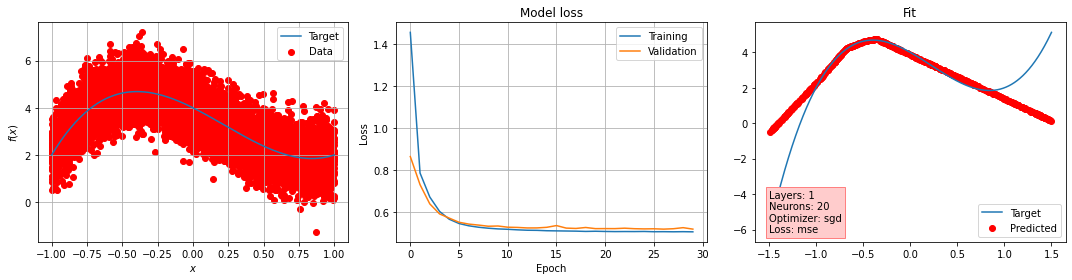

Training loss: 0.5667887376785279
Validation loss: 0.5713386511802674
Test loss: 0.5697111120223999


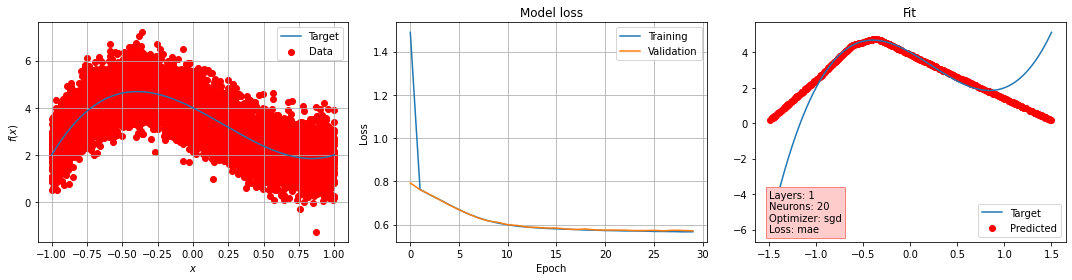

Training loss: 0.5053421414852143
Validation loss: 0.518099265575409
Test loss: 0.5179150695800782


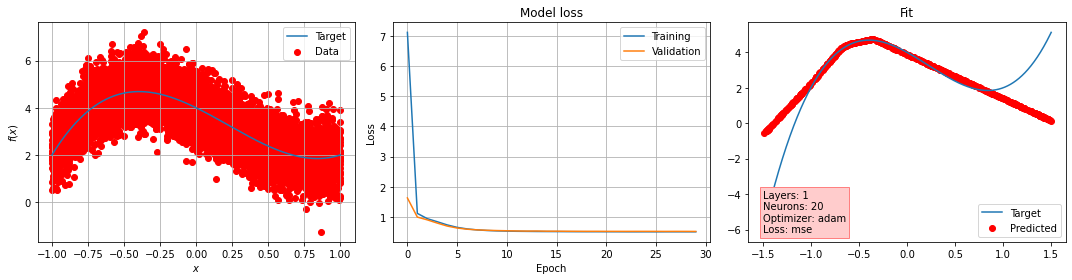

Training loss: 0.5581827816009521
Validation loss: 0.5627339653968811
Test loss: 0.5596132442951203


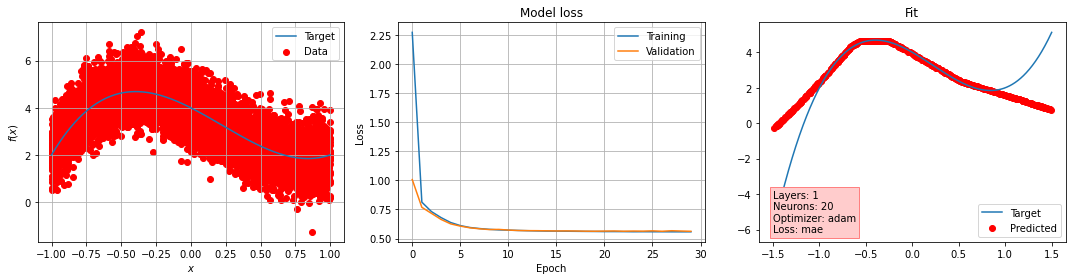

Training loss: 0.506019005870819
Validation loss: 0.5206167702674865
Test loss: 0.5209288944005966


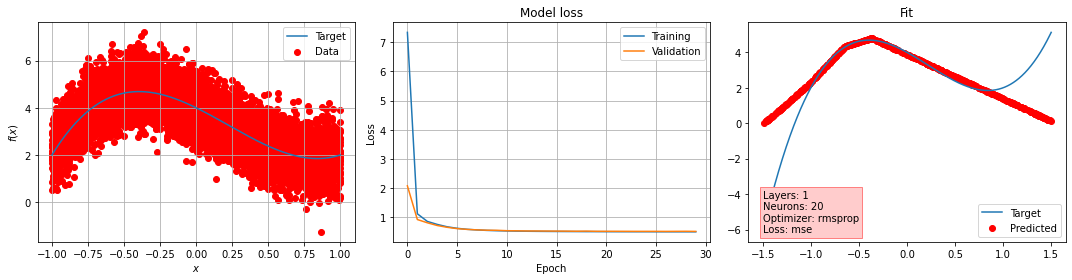

Training loss: 0.5606671069145203
Validation loss: 0.5658479127883911
Test loss: 0.563975738286972


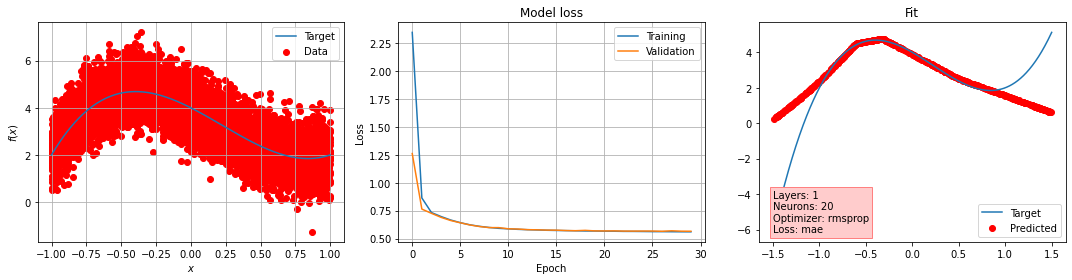

Training loss: 0.49601499047279357
Validation loss: 0.5084739005565644
Test loss: 0.5100885012149811


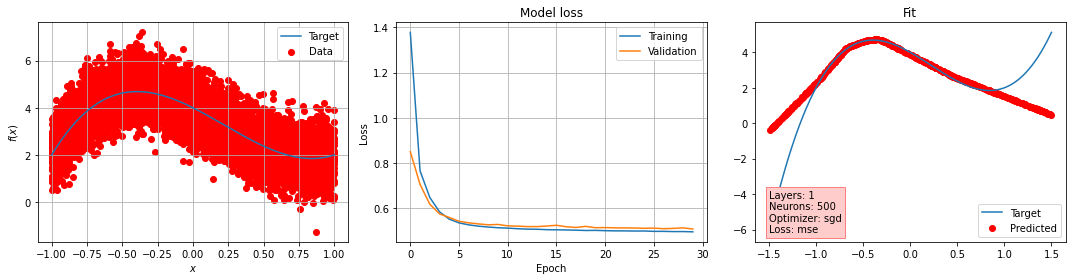

Training loss: 0.5642364756584167
Validation loss: 0.5691704678535462
Test loss: 0.5668436255455017


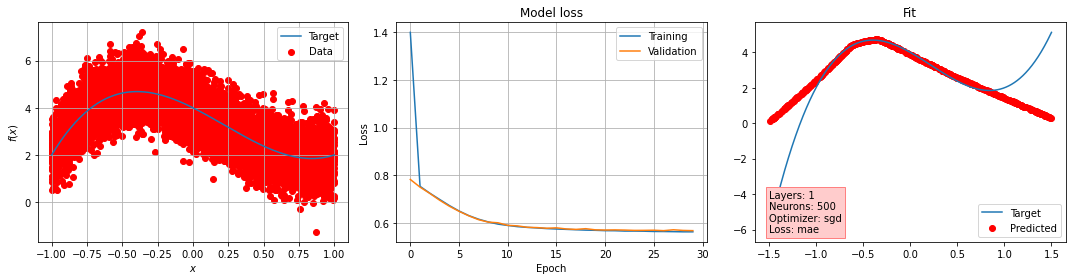

Training loss: 0.49079022436141967
Validation loss: 0.5021695721149445
Test loss: 0.5103549406528473


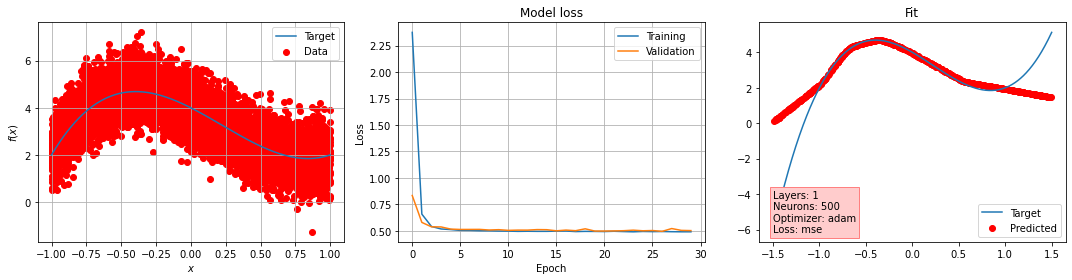

Training loss: 0.5601937122344971
Validation loss: 0.5610562572479248
Test loss: 0.557933301448822


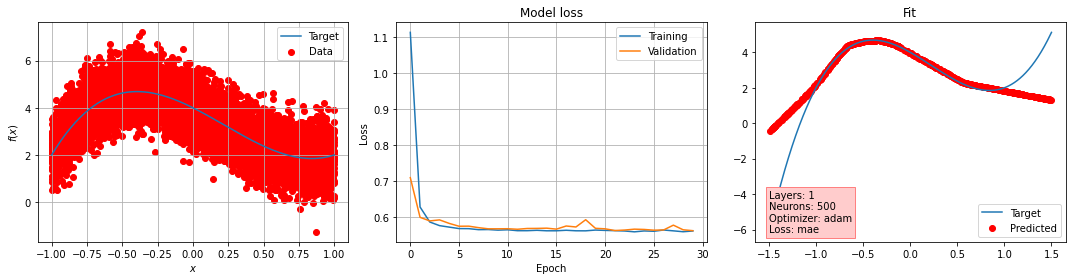

Training loss: 0.4911409230232239
Validation loss: 0.4925507531166077
Test loss: 0.4995742561817169


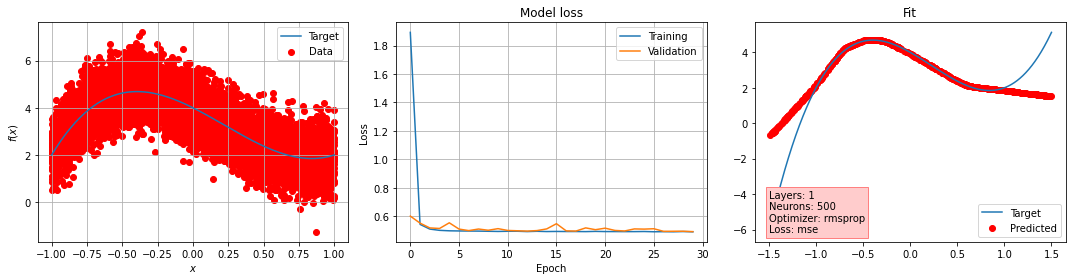

Training loss: 0.5591117656707764
Validation loss: 0.5631617202758789
Test loss: 0.5576520969867707


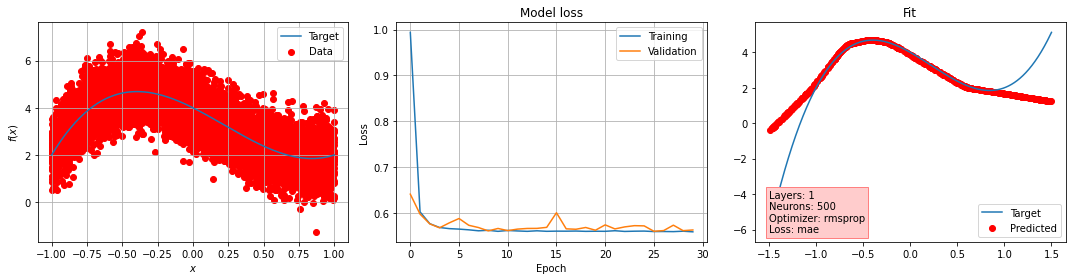

Training loss: 0.4915754997730255
Validation loss: 0.49535274124145506
Test loss: 0.5026625800132751


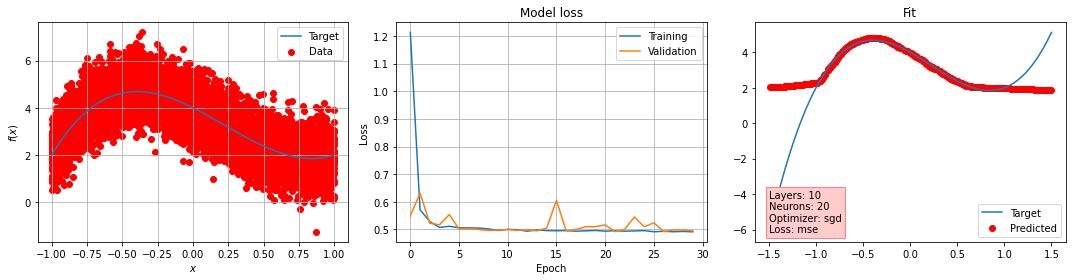

Training loss: 0.5593768500328063
Validation loss: 0.5603307948112488
Test loss: 0.5559058585166932


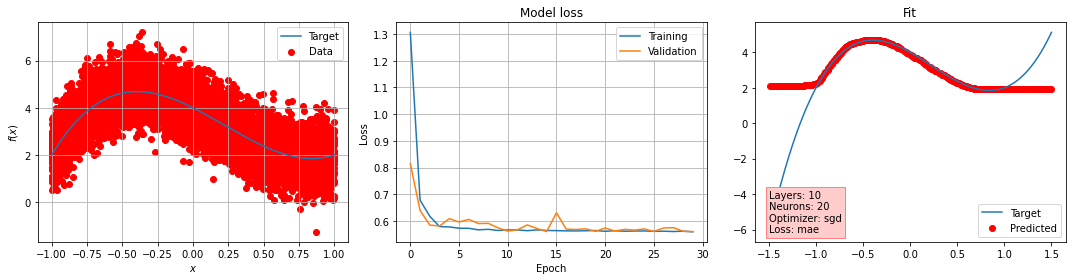

Training loss: 0.49230408926010133
Validation loss: 0.4967696018218994
Test loss: 0.5080612318515778


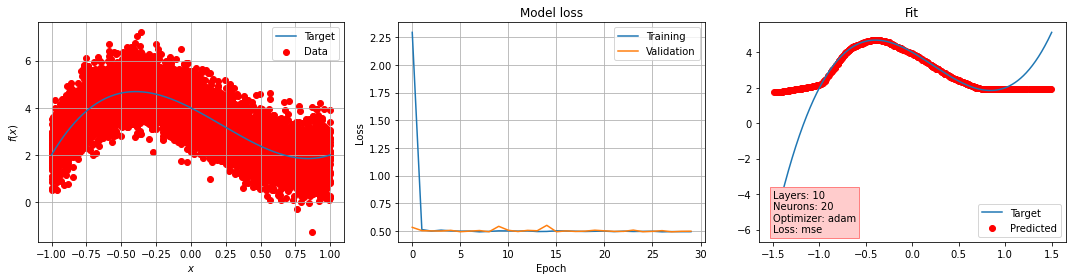

Training loss: 0.5607911823272705
Validation loss: 0.5625048475265503
Test loss: 0.5632839789390564


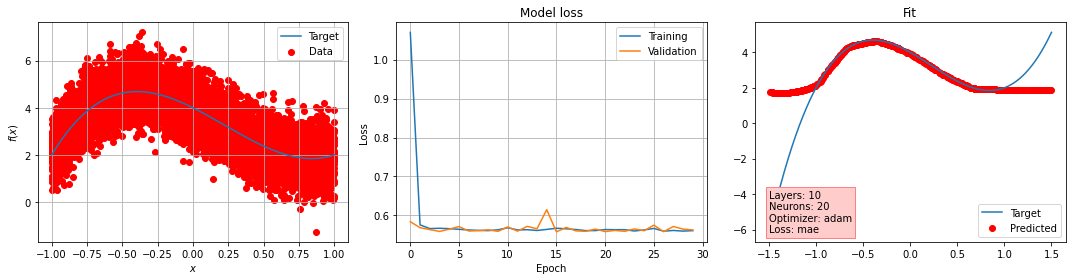

Training loss: 0.4980716421127319
Validation loss: 0.4977983853816986
Test loss: 0.5031027932167054


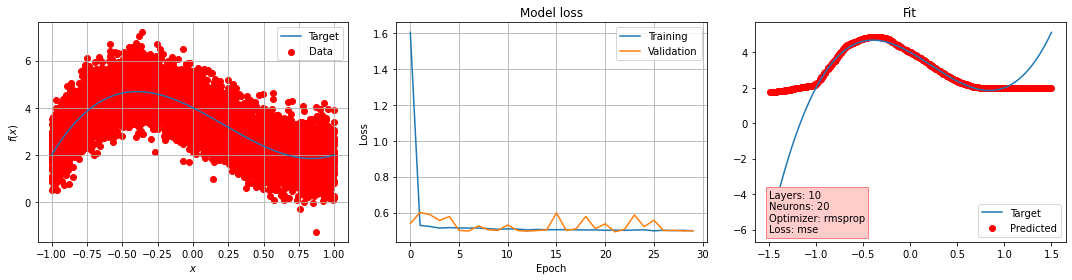

Training loss: 0.5639833191871643
Validation loss: 0.5602346286773682
Test loss: 0.5552967205047608


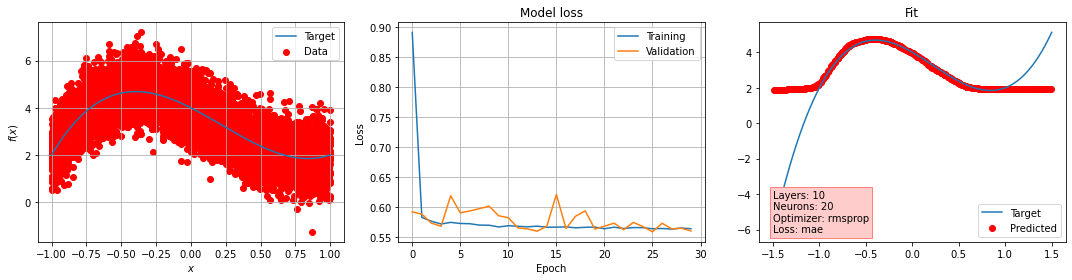

Training loss: 0.49234535446166994
Validation loss: 0.49453771781921385
Test loss: 0.49977357172966


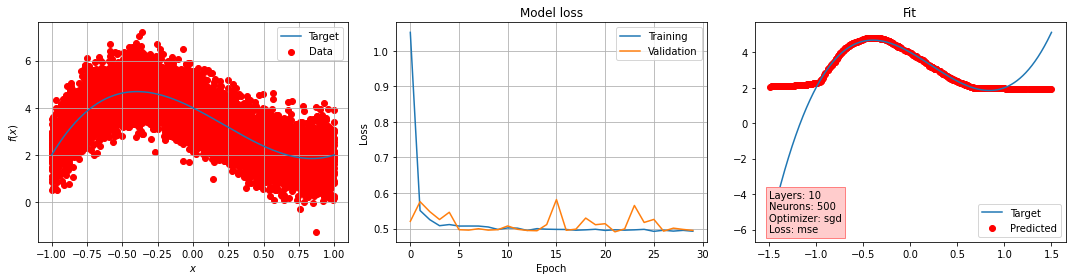

Training loss: 0.5595431150436402
Validation loss: 0.560311619758606
Test loss: 0.5562186348438263


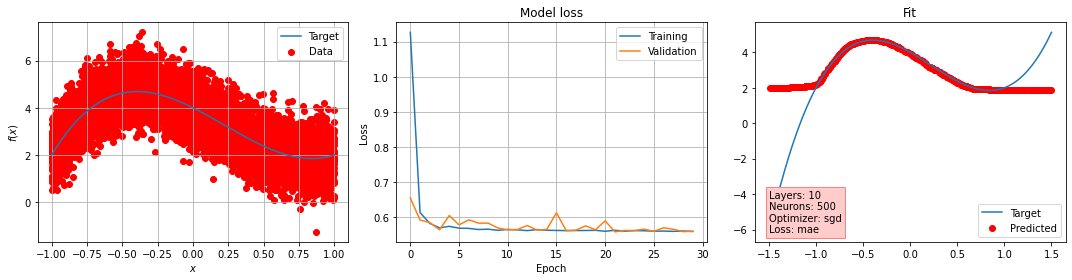

Training loss: 0.4990272172451019
Validation loss: 0.5041023859977722
Test loss: 0.5171126847267151


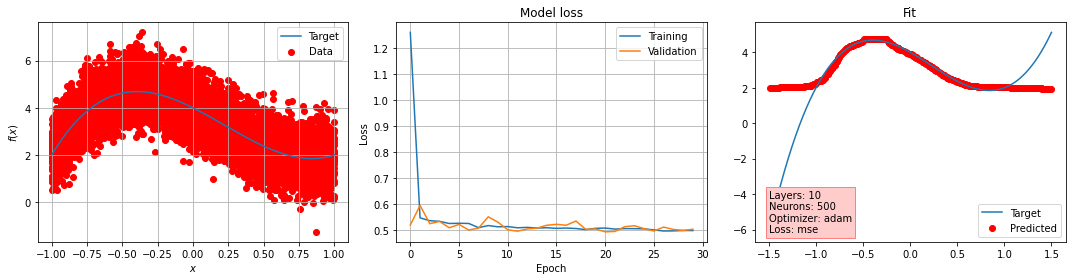

Training loss: 0.564835547542572
Validation loss: 0.5712268085479736
Test loss: 0.5715689973831177


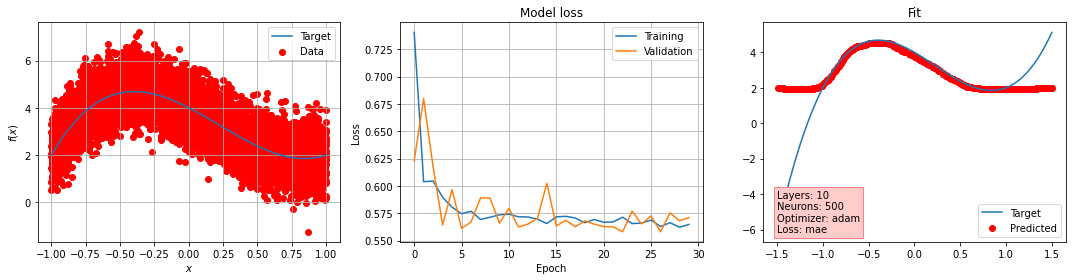

Training loss: 0.501555499458313
Validation loss: 0.5080298681259156
Test loss: 0.5211604549884796


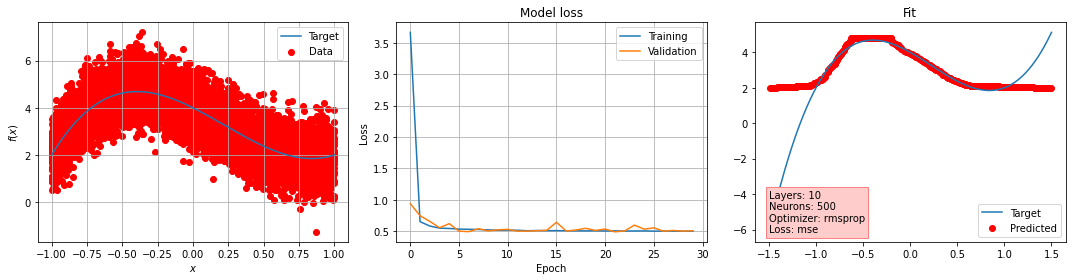

Training loss: 0.566757765674591
Validation loss: 0.5734826040267944
Test loss: 0.5712689576148987


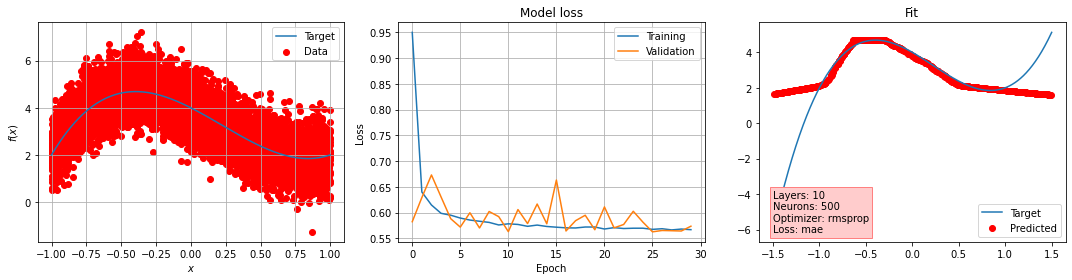

In [8]:
n_layers = [1, 10]
n_neurons = [20, 500]
optimizer = ['sgd', 'adam', 'rmsprop']
losses = ['mse', 'mae']
for i in n_layers :
    for j in n_neurons :
        for opt in optimizer :
            for loss in losses :
                polynomial_fit(i, j, 'relu', opt, loss)

It is an interesting fact that, with 1 layer, there is a better approximation of the curve in the range $[-1.5,-1]$, i.e. out of the range of the training dataset.

### <span style="color:red"> Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### <span style="color:orange"> Solution

In [9]:
f = lambda x: np.sin(x[:,0]*x[:,0] + x[:,1]*x[:,1])

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, (10000, 2))
x_valid = np.random.uniform(-3/2, 3/2, (1000, 2))
x_valid.sort()
y_target = f(x_valid) # ideal (target) function

sigma = 1. # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

In [10]:
model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1,))

model.compile(optimizer='adam', loss='mse')

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50, shuffle=True,
          callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.005, verbose=0, mode='auto')],
          validation_data=(x_valid, y_valid), verbose=0)

Validation loss: 0.9966217114925384
Test loss: 0.030371800906956195


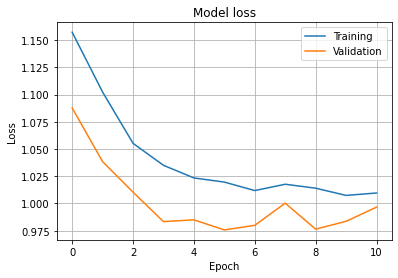

In [11]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Validation loss:', score)

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:', score)

# Plot training & validation loss values
plt.grid(True)
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

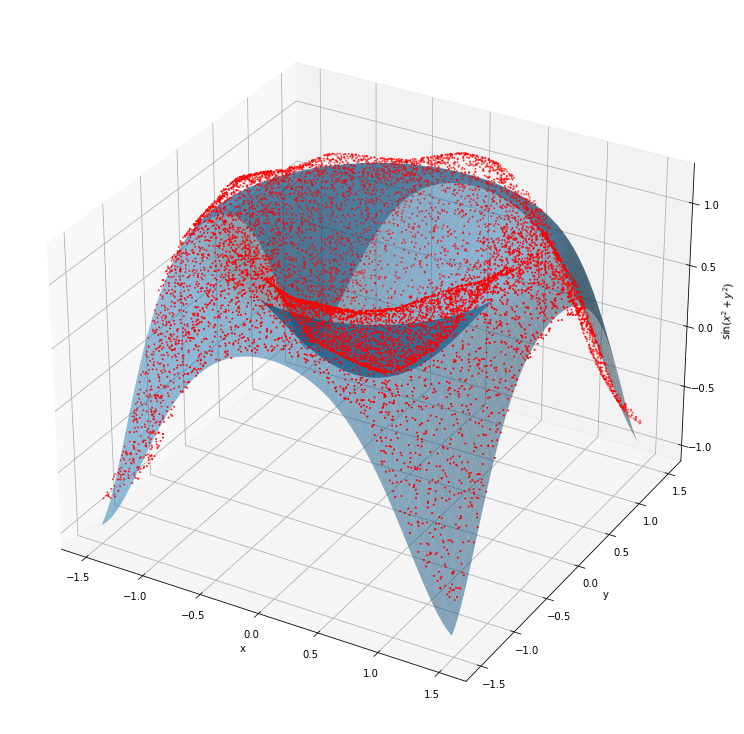

In [12]:
x_predicted = np.random.uniform(-3/2, 3/2, (10000, 2))
y_predicted = model.predict(x_predicted)

X = np.arange(-3./2., 3./2., 0.02)
Y = np.arange(-3./2., 3./2., 0.02)
X, Y = np.meshgrid(X, Y)
R = X**2 + Y**2
Z = np.sin(R)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('sin($x^2+y^2$)')

surf = ax.plot_surface(X, Y, Z, alpha=0.5, linewidth=0, antialiased=True)
ax.scatter(x_predicted[:, 0], x_predicted[:, 1], y_predicted, color='r', marker='o', s=1)

plt.show()